<a href="https://colab.research.google.com/github/PUNEET29GARG/Effect_of_UserRating_on_Restuarants/blob/main/Effect_of_UserRating_on_Restuarant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline

In [ ]:
#Reading data set
df_data=pd.read_csv("/content/zomato_utf.csv")

**BASIC EDA**

In [ ]:
# displays all the columns at a time
pd.set_option("display.max_columns",None)

In [ ]:
#reading first 5 rows
df_data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

**# OBSERVATION :**

By looking at Data we have concluded that [Country Code ,Longitude,Address,Latitude,Rating color] .These columns are not of that much importance for analysing this data set.Therefore creating a new data subset and not including these columns in that.

In [ ]:
df_data_subset=df_data[['Restaurant ID', 'Restaurant Name','City',
       'Locality', 'Locality Verbose',  'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating',  'Rating text',
       'Votes']]


In [ ]:
df_data_subset.shape # now we have 16 columns left

(9551, 16)

In [ ]:
#checking info()
df_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Switch to order menu  9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating text           9551 non-null   object 
 15  Votes                

In [ ]:
df_data_subset.head()

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose  \
0  Century City Mall, Poblacion, Makati City, Mak...   
1  Little Tokyo, Legaspi Village, Makati City, Ma...   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating text  Votes  
0                   No            3               4.8   Excellent    314  
1                   No            3               4.5   Excellent    591  
2                   No            4               4.4   Very Good    270  
3                   No            4               4.9   Excellent    365  
4                   No            4               4.8   Excellent    229

In [ ]:
#checking for missing values
df_data_subset.isnull().sum()

#missing value summary:
#Cuisines                9


Restaurant ID           0
Restaurant Name         0
City                    0
Locality                0
Locality Verbose        0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

**#OBSERVATIONS :**



*   ONLY Cuisines  has missing values i.e 9


1.   Will check why this data is missing and is there something we can do about it.
2.   Will try to find relation of other columns with this missing data.





In [ ]:
#checking missing data:

df_data_subset[df_data_subset.isnull().any(axis=1)]

Restaurant ID                 Restaurant Name            City  \
84        17284105                   Cookie Shoppe          Albany   
87        17284211  Pearly's Famous Country Cookng          Albany   
94        17284158               Jimmie's Hot Dogs          Albany   
297       17374552                  Corkscrew Cafe     Gainesville   
328       17501439                        Dovetail           Macon   
346       17606621            HI Lite Bar & Lounge          Miller   
368       17059060                       Hillstone         Orlando   
418       17142698                Leonard's Bakery  Rest of Hawaii   
455       17616465        Tybee Island Social Club        Savannah   

         Locality         Locality Verbose Cuisines  Average Cost for two  \
84         Albany           Albany, Albany      NaN                     0   
87         Albany           Albany, Albany      NaN                     0   
94         Albany           Albany, Albany      NaN                    10   
297     Dahlonega   Dahlonega, Gainesville      NaN                    40   
328         Macon             Macon, Macon      NaN                    40   
346        Miller           Miller, Miller      NaN                     0   
368   Winter Park     Winter Park, Orlando      NaN                    40   
418       Kaimuki  Kaimuki, Rest of Hawaii      NaN                    10   
455  Tybee Island   Tybee Island, Savannah      NaN                    10   

      Currency Has Table booking Has Online delivery Is delivering now  \
84   Dollar($)                No                  No                No   
87   Dollar($)                No                  No                No   
94   Dollar($)                No                  No                No   
297  Dollar($)                No                  No                No   
328  Dollar($)                No                  No                No   
346  Dollar($)                No                  No                No   
368  Dollar($)                No                  No                No   
418  Dollar($)                No                  No                No   
455  Dollar($)                No                  No                No   

    Switch to order menu  Price range  Aggregate rating Rating text  Votes  
84                    No            1               3.4     Average     34  
87                    No            1               3.4     Average     36  
94                    No            1               3.9        Good    160  
297                   No            3               3.9        Good    209  
328                   No            3               3.8        Good    102  
346                   No            1               3.4     Average     11  
368                   No            3               4.4   Very Good   1158  
418                   No            1               4.7   Excellent    707  
455                   No            1               3.9        Good    309

**#OBSERVATION:**
Where cuisines has NaN ,Is delivering now is No


1.   SO, we have to check if NaN in cuisines is because of No in Is delivering now,because if its a case than missing values of cuisines makes sense.




In [ ]:
# checking Is delivering now ==NO
df_data_subset[df_data_subset["Is delivering now"]=="No"]["Is delivering now"].value_counts()

No    9517
Name: Is delivering now, dtype: int64

**#OBSERVATION:** No! missing value of cuisines is not related to Is delivering now as cuisines missing value =9 only and is delivering now ==NO  = 9517




*   As we can see [Has Table booking, Has Online delivery, Is delivering now, Switch to order menu] also has value No for missing values of cuisines
*   So, let's check these columns relation with cuisines if any.







In [ ]:
#Has Table booking	Has Online delivery	Is delivering now	Switch to order menu
#df_data_subset[(df_data_subset["Is delivering now"]=="No")&(df_data_subset["Has Online delivery"]=="No")&(df_data_subset["Has Table booking"]=="No")&(df_data_subset["Switch to order menu"]=="No")]

OR we can do another thing to check the same

In [ ]:
# creating a new data set for [Has Table booking	Has Online delivery	Is delivering now	Switch to order menu]
missingValues_relation_ifAny=df_data_subset[["Has Table booking",	"Has Online delivery",	"Is delivering now",	"Switch to order menu"]]
# checking value_counts()
missingValues_relation_ifAny.apply(pd.Series.value_counts)

Has Table booking  Has Online delivery  Is delivering now  \
No                8393                 7100               9517   
Yes               1158                 2451                 34   

     Switch to order menu  
No                 9551.0  
Yes                   NaN

**#OBSERVATION:**
This data show that these above mentioned columns has no relation with missing values of cuisines as it is just 9 missing values.



*   so, let's move ahead and we will see if we can fill these cuisines missing value at later point of time or not.



In [ ]:
df_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Switch to order menu  9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating text           9551 non-null   object 
 15  Votes                

**# Checking for duplicay in data set**

In [ ]:
df_data_subset.duplicated().any()

False

**#OBSERVATION:**
t means that the DataFrame df_data_subset has no duplicated rows, and each row is unique

So, now let's check for duplicacy in those colums where it should not be duplicated.

In [ ]:
#Restaurant ID
df_data_subset["Restaurant ID"].duplicated().any()

False

In [ ]:
df_data_subset["Restaurant Name"].duplicated().any()

True

**# OBSERVATION:**

How it is possible that all Restaurant ID are unique but not all Restaurant Name ,because as per our knowledge one resturaunt can have a one resturaunt Id

<br>
let's dig deep to find out why so

In [ ]:
df_data_subset["Restaurant Name"].value_counts()

Cafe Coffee Day                                           83
Domino's Pizza                                            79
Subway                                                    63
Green Chick Chop                                          51
McDonald's                                                48
Keventers                                                 34
Pizza Hut                                                 30
Giani                                                     29
Baskin Robbins                                            28
Barbeque Nation                                           26
Giani's                                                   22
Barista                                                   22
Dunkin' Donuts                                            22
Costa Coffee                                              20
Pind Balluchi                                             20
Wah Ji Wah                                                19
Twenty Four Seven       

In [ ]:
df_data_subset[df_data_subset["Restaurant Name"]=="Subway"]

Restaurant ID Restaurant Name       City  \
675         2400279          Subway  Allahabad   
889        18408041          Subway  Faridabad   
959            3866          Subway  Faridabad   
1196           3449          Subway    Gurgaon   
1267            157          Subway    Gurgaon   
1291            158          Subway    Gurgaon   
1309           9778          Subway    Gurgaon   
1497           6643          Subway    Gurgaon   
1570            159          Subway    Gurgaon   
1706           1313          Subway    Gurgaon   
2063         306883          Subway    Gurgaon   
2064           4817          Subway    Gurgaon   
2157         305919          Subway    Gurgaon   
2237         310531          Subway    Gurgaon   
3074         302156          Subway  New Delhi   
3246         312586          Subway  New Delhi   
3460         307167          Subway  New Delhi   
3583         306031          Subway  New Delhi   
3652            147          Subway  New Delhi   
3730         308367          Subway  New Delhi   
3939         306247          Subway  New Delhi   
4199         311616          Subway  New Delhi   
4250         307785          Subway  New Delhi   
4334           9700          Subway  New Delhi   
4513           2272          Subway  New Delhi   
4615         306403          Subway  New Delhi   
4658            154          Subway  New Delhi   
4991         305604          Subway  New Delhi   
5153         301190          Subway  New Delhi   
5459         311734          Subway  New Delhi   
5493           8840          Subway  New Delhi   
5630         311451          Subway  New Delhi   
5843            148          Subway  New Delhi   
5872           3230          Subway  New Delhi   
5992           4566          Subway  New Delhi   
6221       18138442          Subway  New Delhi   
6277         311512          Subway  New Delhi   
6418           8801          Subway  New Delhi   
6453         309232          Subway  New Delhi   
6593           7441          Subway  New Delhi   
6651         300397          Subway  New Delhi   
6743           3229          Subway  New Delhi   
6810           7322          Subway  New Delhi   
7021           4278          Subway  New Delhi   
7263         311115          Subway  New Delhi   
7312         310891          Subway  New Delhi   
7507            149          Subway  New Delhi   
7694           3779          Subway  New Delhi   
7734           3507          Subway  New Delhi   
7915         309198          Subway  New Delhi   
7973           3455          Subway  New Delhi   
7981       18316173          Subway  New Delhi   
8175       18440424          Subway      Noida   
8278         307340          Subway      Noida   
8323       18204456          Subway      Noida   
8346       18481281          Subway      Noida   
8387         308451          Subway      Noida   
8455           1070          Subway      Noida   
8736           3707          Subway      Noida   
8884         308758          Subway      Noida   
8923           7909          Subway      Noida   
9041           4482          Subway      Noida   
9070       18070483          Subway      Noida   

                                           Locality  \
675                                     Civil Lines   
889      Crown Interiorz Mall, Sector 35, Faridabad   
959                                       Sector 15   
1196           Central Plaza Mall, Golf Course Road   
1267                      DLF Galleria, DLF Phase 4   
1291                     DLF Mega Mall, DLF Phase 1   
1309                                    DLF Phase 1   
1497      Hong Kong Bazaar Mall, Sector 57, Gurgaon   
1570                 MGF Metropolitan Mall, MG Road   
1706                       Qutab Plaza, DLF Phase 1   
2063                                     Sohna Road   
2064                                     Sohna Road   
2157  Sushant Shopping Arcade, Sushant Lok, Gurgaon   
2237          Unitech Infospace, Se

**#CORRECTION in PREVIOUS OBSERVATION:**



*  YES! Resturaunt id can be different for same Resturaunt Name as it is in some different city.



In [ ]:
df_data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Locality              9551 non-null   object 
 4   Locality Verbose      9551 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Currency              9551 non-null   object 
 8   Has Table booking     9551 non-null   object 
 9   Has Online delivery   9551 non-null   object 
 10  Is delivering now     9551 non-null   object 
 11  Switch to order menu  9551 non-null   object 
 12  Price range           9551 non-null   int64  
 13  Aggregate rating      9551 non-null   float64
 14  Rating text           9551 non-null   object 
 15  Votes                

In [ ]:
#Checking if there is any invalid entry
#df_data_subset["Average Cost for two"].unique()

#no invalid entry found

In [ ]:
df_data_subset["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(å£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

**#Observation:**


*  We have different currencies in our data but we have to compare price range in order to analyse how ratings depend on price range.
*   Therefore we have to convert it to one common currency for all



**# Converting currency to one commom unit i.e. US dollar.**

In [ ]:
#creating a dictionary of exchange rates--->these exchange rates are taken froom google
exchange_rates = {
    'Botswana Pula(P)': 0.087,
    'Brazilian Real(R$)': 0.19,
    'Dollar($)': 1.0,
    'Emirati Diram(AED)': 0.27,
    'Indian Rupees(Rs.)': 0.012,
    'Indonesian Rupiah(IDR)': 0.000069,
    'NewZealand($)': 0.70,
    'Pounds(å£)': 1.38,
    'Qatari Rial(QR)': 0.27,
    'Rand(R)': 0.068,
    'Sri Lankan Rupee(LKR)': 0.0051,
    'Turkish Lira(TL)': 0.11
}


#Creating a new colum with same unit as US dollar for Average Cost for two
df_data_subset['Average Cost for two in (USD)'] = df_data['Average Cost for two'] * df_data['Currency'].map(exchange_rates)
#df_data_subset.head()

<ipython-input-93-f36178816c69>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_subset['Average Cost for two in (USD)'] = df_data['Average Cost for two'] * df_data['Currency'].map(exchange_rates)


#VISUALAIZING DATA

<Axes: xlabel='Aggregate rating', ylabel='Average Cost for two in (USD)'>

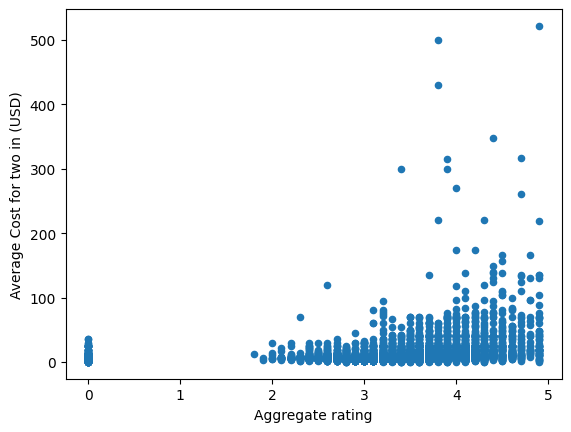

In [ ]:
#plotting scatter plot between Average Cost for two in (USD)" and "Aggregate rating"
df_data_subset[["Average Cost for two in (USD)","Aggregate rating"]].plot(kind="scatter",x="Aggregate rating",y="Average Cost for two in (USD)")

<Axes: xlabel='Rating text', ylabel='Average Cost for two in (USD)'>

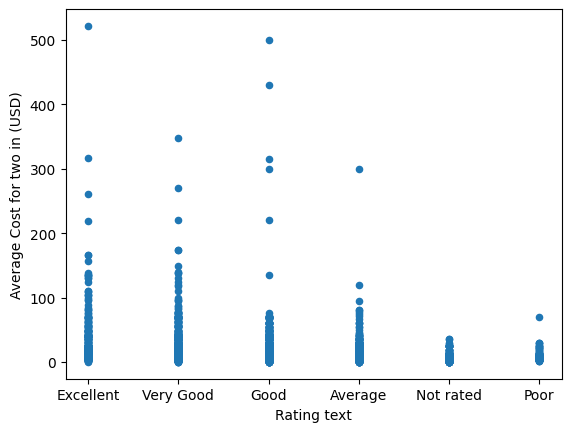

In [ ]:
##plotting scatter plot between Average Cost for two in (USD)" and "Rating text"
df_data_subset[["Average Cost for two in (USD)","Rating text"]].plot(kind="scatter",x="Rating text",y="Average Cost for two in (USD)")

**#OBSERVATION 1:**


*   From the above two plots we can conclude that there is some relation between Not rated and aggregate rating being zero
*   Let's try to find it out








In [ ]:
#Checking no. of entries for ["Aggregate rating"]==0.0
df_data_subset.loc[df_data_subset["Aggregate rating"]==0.0, "Aggregate rating"].value_counts()

0.0    2148
Name: Aggregate rating, dtype: int64

In [ ]:
#Checking no. of entries for ["Rating text"]=="Not rated"
df_data_subset.loc[df_data_subset["Rating text"]=="Not rated", "Rating text"].value_counts()

Not rated    2148
Name: Rating text, dtype: int64

In [ ]:
#creating a new data for ["Rating text"]=="Not rated"
Rating_text_Not_rated=df_data_subset[df_data_subset["Rating text"]=="Not rated"]
Rating_text_Not_rated

Restaurant ID                                    Restaurant Name  \
30          6600060                                     Sandubas CafÌ©   
58          7305048                              Quiosque Chopp Brahma   
69          6710645                                   Cantinho da Gula   
77          6701419                                      Divino FogÌ£o   
78          6703956                                        Super Grill   
238        18453427                                        Frick's Tap   
239        17793744                                         Los Agaves   
412        18491935                                         Nosh Mahal   
871            9299                              Aggarwal Sweet Corner   
872            9178                              Kashyap Vaishno Dhaba   
873        18477319                                   Total Food Court   
874        18433852                                      The Chaiwalas   
878        18377449                                        Aapki Rasoi   
879        18465871                                 Fusion Food Corner   
880        18472646                                      Punjabi Rasoi   
887        18471268                                      Baskin Robbin   
888        18381244                                     Popcorn Fusion   
889        18408041                                             Subway   
897          304062                                Jai Jagannath Hotel   
899          312514                                        Maggi Point   
900          308961                                             Angaar   
901          308963                                              TcozY   
902          308962                                      The Retriever   
903            8169                        Bangali Sweets & Restaurant   
904          309368                                             Silver   
905        18472429                                     Chill 'N Grill   
906        18472418                                 Punjabi Restaurant   
907        18472426                             Standard Chicken Point   
908        18450934                                 The Grillz & Gravy   
912        18471296                                        Little Cafe   
918        18434243                                            Giani's   
919        18273628                                         Invitation   
920        18471262                                        New Dilight   
927        18427216                                         City Dhaba   
928        18433315                                       Garam Masala   
929            8266                                   Mittal Fast Food   
970        18466931                                    Apna Restaurant   
971        18466420                          Chaudhary Chaap & Chinese   
972        18464607                                     Chings Chinese   
973        18464631                                     Food On Wheels   
974          301170                                      Gulshan Hotel   
975        18466939                                     Maa Kali Foods   
976        18380180                                 The Street Kitchen   
977        18466407                                     United Kitchen   
987        18472625                                   Tmos Cafe Corner   
994        18439547                                        Anand Dhaba   
995        18241538                       Bikaneri Sweets & Restaurant   
996        18452730                          Delicieux Ice Cream Rolls   
997        18317486                                     Flying Tandoor   
998        18432933                                       Food Station   
999        18452267                                           Grub Hub   
1000       18466980                                     Punjabi Chulha   
1001       18469937                               Purani Dilli Da Swad   
1002      

In [ ]:
#Checking value counts
Rating_text_Not_rated["Votes"].value_counts()

0    1094
1     483
2     327
3     244
Name: Votes, dtype: int64

**#OBSERVATION :**


*   Where ["Rating text"]=="Not rated"  ,no. of votes are very low i.e maximum 3.
*   So, its better to get rid of this data Where ["Rating text"]=="Not rated" , because we will not be able to analyse restaurants performance or popularity in absence of ratings and some minimum required votes.



In [ ]:
#getting rid of entries == not rated
df_data_subset=df_data_subset[df_data_subset["Rating text"] != "Not rated"]

In [ ]:
#Checking updated data
df_data_subset["Rating text"].value_counts()

Average      3737
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

**#OBSERVATION :**



*   From above two graph plots it seems that no. of aggregate rating is very low for price greater than 250 USD.
*   Will check for no. of votes in data where cost for two is more than 250 USD, So that we can know wheather to keep them in data or not.



In [ ]:
#Checking how much entries are there for ["Average Cost for two in (USD)"]>250.000000]
df_data_subset[df_data_subset["Average Cost for two in (USD)"]>250.000000].shape

(10, 17)

In [ ]:
df_data_subset[df_data_subset["Average Cost for two in (USD)"]>250.000000]["Votes"].value_counts()

33     3
34     2
270    1
621    1
535    1
35     1
320    1
Name: Votes, dtype: int64

**#Conclusion: we can keep these entries in our data set as there are plenty of votes**

In [ ]:
df_data_subset.describe()

Restaurant ID  Average Cost for two  Price range  Aggregate rating  \
count   7.403000e+03           7403.000000  7403.000000       7403.000000   
mean    7.158676e+06           1448.415102     1.970147          3.440024   
std     8.444634e+06          18303.524265     0.930611          0.552195   
min     5.300000e+01              0.000000     1.000000          1.800000   
25%     1.534450e+04            300.000000     1.000000          3.000000   
50%     3.120540e+05            500.000000     2.000000          3.400000   
75%     1.821955e+07            800.000000     3.000000          3.800000   
max     1.849606e+07         800000.000000     4.000000          4.900000   

              Votes  Average Cost for two in (USD)  
count   7403.000000                    7403.000000  
mean     202.185060                      12.077894  
std      479.195199                      19.785021  
min        4.000000                       0.000000  
25%       19.000000                       4.800000  
50%       60.000000                       7.200000  
75%      181.000000                      12.000000  
max    10934.000000                     522.000000

In [ ]:
x_=df_data_subset[["Average Cost for two in (USD)","Rating text"]]
x_

Average Cost for two in (USD) Rating text
0                            95.700   Excellent
1                           104.400   Excellent
2                           348.000   Very Good
3                           130.500   Excellent
4                           130.500   Excellent
5                            87.000   Very Good
6                           174.000   Very Good
7                           174.000   Very Good
8                           522.000   Excellent
9                            95.700   Excellent
10                           69.600   Excellent
11                           78.300   Very Good
12                           69.600   Excellent
13                           87.000   Very Good
14                           60.900   Very Good
15                           69.600        Good
16                           73.950   Very Good
17                          104.400   Excellent
18                           52.200   Excellent
19                          130.500   Very Good
20                          261.000   Excellent
21                          156.600   Excellent
22                           10.450     Average
23                            5.700        Good
24                            8.550        Good
25                           11.400        Good
26                            9.500     Average
27                           15.200     Average
28                           17.100        Good
29                           38.000        Good
31                           28.500   Very Good
32                           19.000     Average
33                           11.400        Good
34                           19.000   Very Good
35                           43.700   Very Good
36                           19.000        Good
37                           28.500   Very Good
38                           45.600     Average
39                           43.700   Excellent
40                           66.500     Average
41                            9.500        Good
42                           26.600   Very Good
43                           19.000   Excellent
44                           11.400   Excellent
45                           17.100   Excellent
46                           32.300   Very Good
47                           11.400   Excellent
48                           19.000   Excellent
49                           17.100   Excellent
50                           22.800   Excellent
51                           32.300   Excellent
52                           17.100   Very Good
53                           28.500   Very Good
54                           47.500   Excellent
55                           22.800   Very Good
56                            7.600   Very Good
57                           47.500   Very Good
59                           57.000   Excellent
60                           16.150   Excellent
61                           15.200   Very Good
62                           47.500   Excellent
63                           47.500   Very Good
64                           13.300     Average
65                           19.000   Very Good
66                           57.000   Excellent
67                           22.800   Excellent
68                           14.250        Good
70                           38.000     Average
71                           22.800        Good
72                           57.000   Very Good
73                           43.700        Good
74                           22.800   Very Good
75                           28.500   Very Good
76                           76.000   Very Good
79                           19.000   Very Good
80                           13.300   Excellent
81                           22.800   Very Good
82                           25.000     Average
83                           10.000     Average
84                            0.000     Average
85                            0.000     Average
86                           10.000     Average
87                    

In [ ]:
import seaborn as sns

**LET'S START EXTRACTING SOME INSIGHTS FROM THIS DATA**

As we know user rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

 Let's do the analysis of how the rating is affected by restaurant due to following features:
1. Number of Votes given to Restaurant.
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

**Number of Votes given to Restaurant**

In [ ]:
#creating a new data set  with "Votes","Rating text","Aggregate rating"
Votes_given_Restaurant=df_data_subset[["Votes","Rating text","Aggregate rating"]]

In [ ]:
Votes_given_Restaurant["Votes"].nunique()

1008

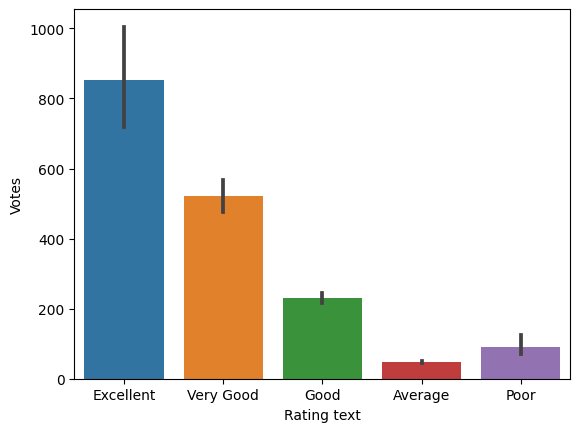

In [ ]:
sns.barplot(x='Rating text', y='Votes', data=Votes_given_Restaurant)
plt.show()

In [ ]:
# displays all the columns at a time
#pd.set_option("display.max_rows",None)
Votes_given_Restaurant[Votes_given_Restaurant["Votes"]>5000].groupby("Rating text").Votes.value_counts()

Rating text  Votes
Excellent    5434     1
             5705     1
             5966     1
             6907     1
             9667     1
             10934    1
Very Good    5145     1
             5172     1
             5288     1
             5385     1
             7574     1
             7931     1
Name: Votes, dtype: int64

<Axes: xlabel='Rating text', ylabel='Votes'>

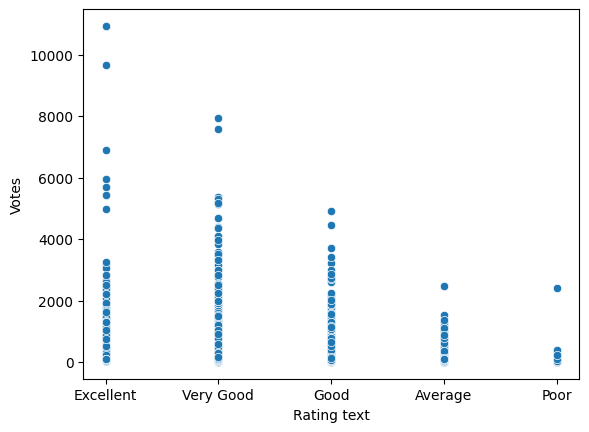

In [ ]:
sns.scatterplot(x='Rating text', y='Votes', data=Votes_given_Restaurant)

<Axes: xlabel='Rating text', ylabel='Votes'>

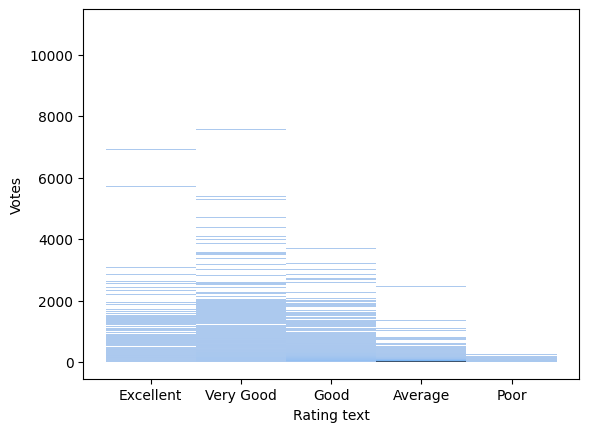

In [ ]:
sns.histplot(x='Rating text', y='Votes', data=Votes_given_Restaurant)

**#OBSERVATION :**

we have this data which shows there are some entries with votes grater than 5000 also   see below:

Rating text  Votes
Excellent    5434     1<br>
             5705     1<br>
             5966     1<br>
             6907     1<br>
             9667     1<br>
             10934    1<br>
Very Good    5145     1<br>
             5172     1<br>
             5288     1<br>
             5385     1<br>
             7574     1<br>
             7931     1<br>
Name: Votes, dtype: int64


**conclusion:**

the best plot for 'Rating text' Vs y='Votes  is scatter plot  as bar is giving no idea as bar are vertically continuous and we can't get an idea from it  that  how many times a specific vote no. appears

and hist plot is not showing data where votes no. is really high

**but scatter plot is perfectly showing all the votes.**

**#Conclusion: maximum time maximum votes are for very good category and excellet is also showing good result so we can inffer that maximum people going to the restuaraunt with verygood rating followed by excelent.**

 **Average Cost of Restaurants**

<Axes: xlabel='Aggregate rating', ylabel='Average Cost for two in (USD)'>

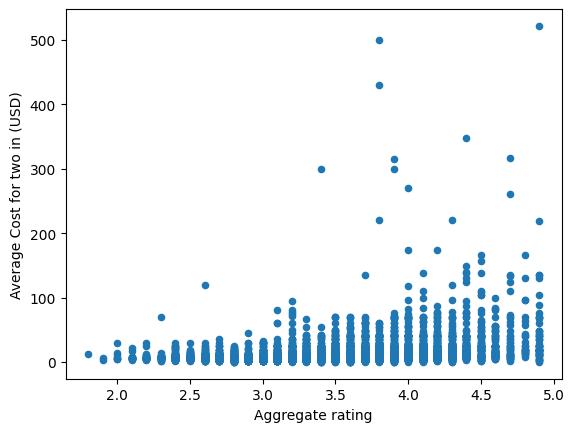

In [ ]:
#plotting scatter plot between Average Cost for two in (USD)" and "Aggregate rating"
df_data_subset[["Average Cost for two in (USD)","Aggregate rating"]].plot(kind="scatter",x="Aggregate rating",y="Average Cost for two in (USD)")

**# our conclusion: we can see from the above plot that ratings from 3.2 to 4.9 is given maximum times for the price range below 100 dollar so we can conclude that people enjoy eating at places that do not strain their budget.**

In [ ]:
#for supporting our above conclusion statistically-->checking cost in the range of 10 to 100 dollars
x=df_data_subset[(df_data_subset["Average Cost for two in (USD)"]<100.000000) & (df_data_subset["Average Cost for two in (USD)"]>10.000000)]
x.groupby("Average Cost for two in (USD)")["Aggregate rating"].value_counts()

Average Cost for two in (USD)  Aggregate rating
10.200                         3.6                 10
                               3.4                  7
                               4.1                  5
                               3.3                  4
                               4.4                  4
                               2.5                  3
                               2.9                  3
                               3.5                  3
                               3.7                  3
                               3.9                  3
                               4.2                  3
                               3.2                  2
                               2.6                  1
                               3.0                  1
                               3.1                  1
                               3.8                  1
                               4.0                  1
                               4.3

2. Show division of restaurants based on . Plot Suitable graphs for each
1. Cuisines served
2. Locality
3. Price Range **bold text**

In [ ]:
#checking distribution of top 20 resturants localitywise
Locality_wise_restro_dist=df_data_subset["Locality"].value_counts().nlargest(20)
Locality_wise_restro_dist

Connaught Place           119
Rajouri Garden             98
Malviya Nagar              85
Defence Colony             79
Satyaniketan               78
Rajinder Nagar             78
Pitampura                  77
Sector 18                  75
Karol Bagh                 72
Kalkaji                    70
DLF Phase 3                69
Safdarjung                 69
Greater Kailash (GK) 2     66
Greater Kailash (GK) 1     66
Kamla Nagar                62
Punjabi Bagh               60
Paharganj                  60
Sector 15                  57
Mayur Vihar Phase 1        57
Hauz Khas                  57
Name: Locality, dtype: int64

Text(0, 0.5, 'NO. of Resturaunts')

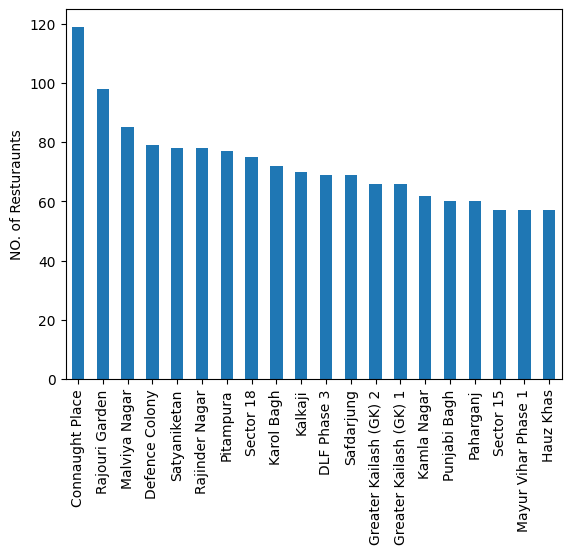

In [ ]:
#plotting bar graph
Locality_wise_restro_dist.plot(kind="bar",y="Locality_wise_restro_dist.values")
plt.ylabel("NO. of Resturaunts")

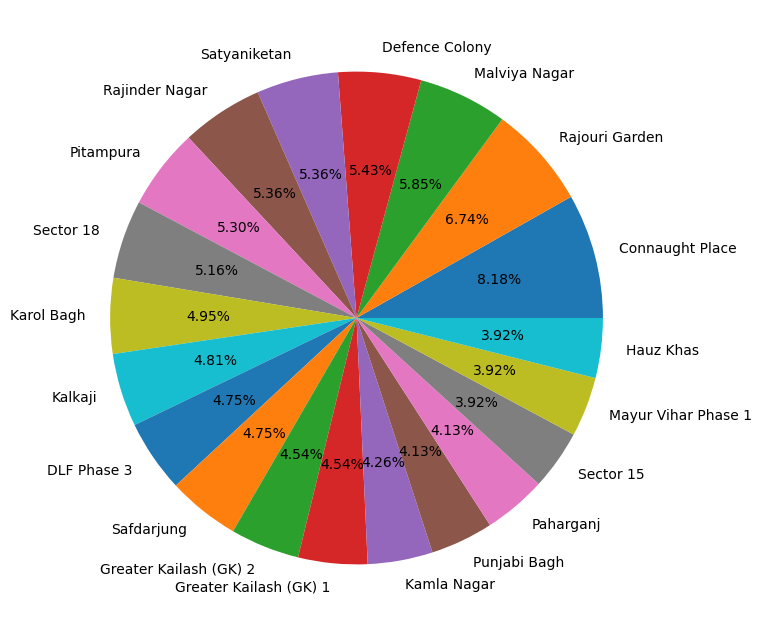

In [ ]:
#pie chart
plt.figure(figsize=(8,8))
plt.pie(Locality_wise_restro_dist.values,labels=Locality_wise_restro_dist.index,autopct="%.2f%%")
plt.show()

**#observation: bar graph shows no. wise distribution and pie shows % wise so we can say that maximum no. of resturants in this data are from india so it would not be wrong to say people likes indian cuisine the most.**

**Price Range**

Text(0.5, 1.0, 'Price range wise dist. of no. of resturaunts')

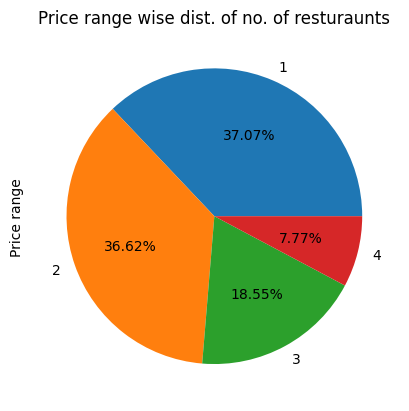

In [ ]:
df_data_subset["Price range"].value_counts().plot(kind="pie",autopct="%.2f%%" )
plt.title("Price range wise dist. of no. of resturaunts")

<Axes: >

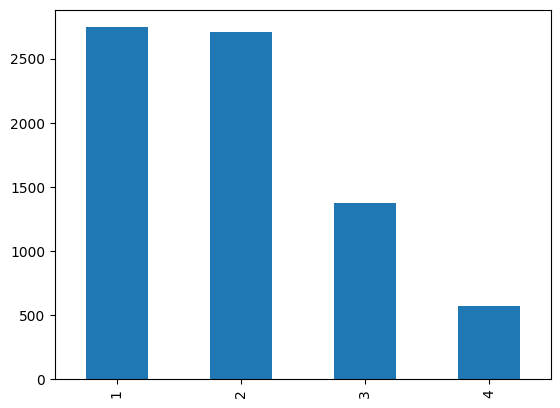

In [ ]:
#bar graph
df_data_subset["Price range"].value_counts().plot(kind="bar")

**#OBSERVATION : MAXIMUM NO. OF RESTURAUNTS FALLS UNDER PRICE RANGE OF 3 AND 4**

**Cuisines served**

Checking for top 25 cuisines served.

In [ ]:
df_data_subset["Cuisines"].value_counts().nlargest(25)

North Indian                                492
North Indian, Chinese                       397
North Indian, Mughlai                       294
Cafe                                        252
Fast Food                                   228
Chinese                                     224
North Indian, Mughlai, Chinese              164
Bakery                                      130
Bakery, Desserts                            116
Pizza, Fast Food                            113
Street Food                                  95
South Indian                                 81
Chinese, Fast Food                           80
Bakery, Fast Food                            79
Mithai, Street Food                          70
Ice Cream, Desserts                          68
Chinese, North Indian                        65
Bakery, Desserts, Fast Food                  61
North Indian, Chinese, Fast Food             61
North Indian, Chinese, Mughlai               61
American, Fast Food, Salad, Healthy Food

**# bar chart showing distribution of resturants on cuisines served basis**

<Axes: >

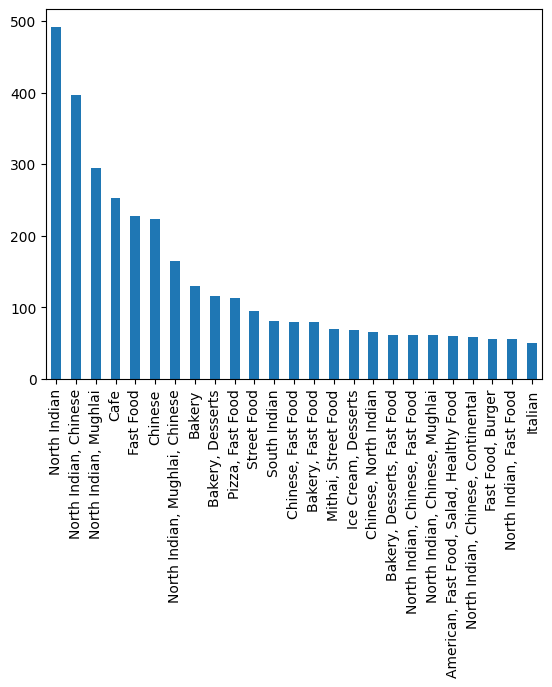

In [ ]:
#bar chart
df_data_subset["Cuisines"].value_counts().nlargest(25).plot(kind="bar")


Write a short detail analysis of how the rating is affected by restaurant due following
features: Plot a suitable graph to explain your inference. For each of the point

In [ ]:
#creating a new data set
df=df_data_subset[["Cuisines","Restaurant Name","Rating text","Aggregate rating"]]
df.head()

Cuisines         Restaurant Name Rating text  \
0        French, Japanese, Desserts        Le Petit Souffle   Excellent   
1                          Japanese        Izakaya Kikufuji   Excellent   
2  Seafood, Asian, Filipino, Indian  Heat - Edsa Shangri-La   Very Good   
3                   Japanese, Sushi                    Ooma   Excellent   
4                  Japanese, Korean             Sambo Kojin   Excellent   

   Aggregate rating  
0               4.8  
1               4.5  
2               4.4  
3               4.9  
4               4.8

In [ ]:
import pandas as pd

#creating a new column to know the no. of a cuisines served by a restro
#here we will split this col by comma and than count the no. of words

df['Cuisine Count'] = df['Cuisines'].astype(str).str.split(', ').apply(len)
#grouped = df.groupby('Cuisine Count')['Rating text'].mean()
df.head()

<ipython-input-123-cfc2cb738ade>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine Count'] = df['Cuisines'].astype(str).str.split(', ').apply(len)


Cuisines         Restaurant Name Rating text  \
0        French, Japanese, Desserts        Le Petit Souffle   Excellent   
1                          Japanese        Izakaya Kikufuji   Excellent   
2  Seafood, Asian, Filipino, Indian  Heat - Edsa Shangri-La   Very Good   
3                   Japanese, Sushi                    Ooma   Excellent   
4                  Japanese, Korean             Sambo Kojin   Excellent   

   Aggregate rating  Cuisine Count  
0               4.8              3  
1               4.5              1  
2               4.4              4  
3               4.9              2  
4               4.8              2

In [ ]:
#Checking mean agg rating based on no. of cuisines served
grouped = df.groupby('Cuisine Count')['Aggregate rating'].mean()
grouped

Cuisine Count
1    3.406046
2    3.389003
3    3.488584
4    3.581149
5    3.598125
6    3.775000
7    3.671429
8    3.684615
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Cuisine Count'>

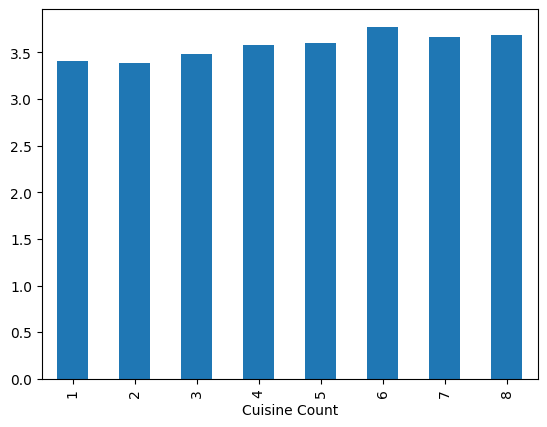

In [ ]:
grouped.plot(kind="bar")

**#Conclusion: from above plot it is clear that there is no significant effect of no. of cuisines served on resturant rating.**

**Restaurant serving some specific cuisines.**

In [ ]:
#calculating mean agg rating  based on  specific cuisines  ---> showing top 50 results
grouped = df.groupby('Cuisines')['Aggregate rating'].mean().nlargest(50)
#grouped

<Axes: xlabel='Cuisines'>

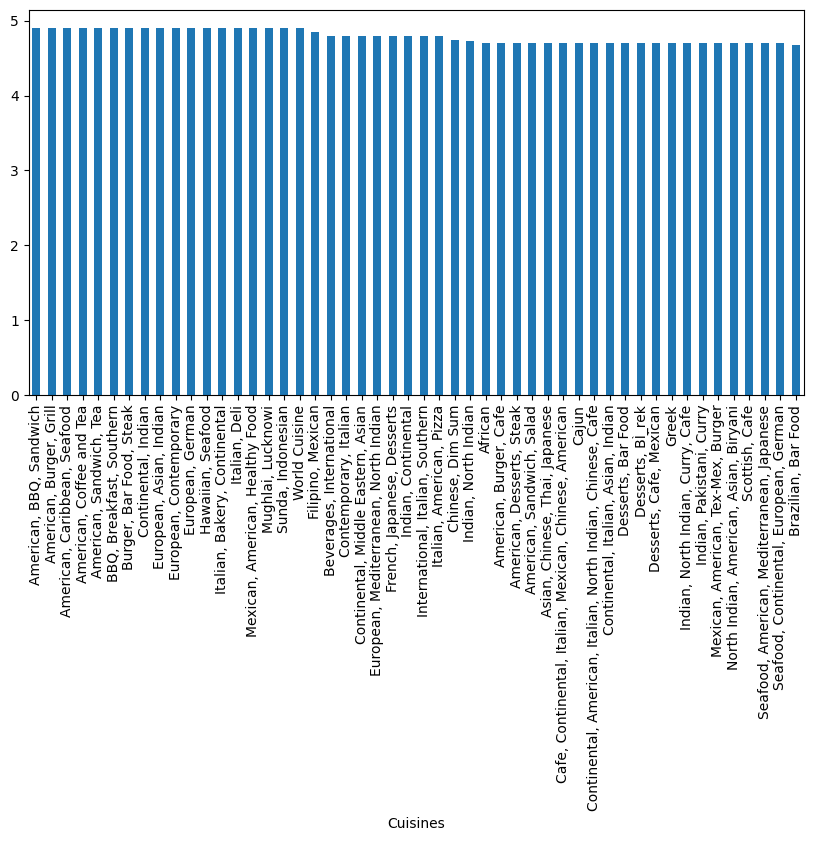

In [ ]:
plt.figure(figsize=(10,5))
grouped.plot(kind="bar")

**#Conclusion: from above plot it is clear that there is no significant effect of specific cuisines served on resturant rating.**